特征数据中的缺失值数量：
0

目标变量中的缺失值数量：
0

数据集形状： (20640, 8)
目标变量形状： (20640,)

特征名称：
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

线性回归模型的均方误差: 0.5559
线性回归模型的R²分数: 0.5758

模型回归系数:
MedInc: 0.448675
HouseAge: 0.009724
AveRooms: -0.123323
AveBedrms: 0.783145
Population: -0.000002
AveOccup: -0.003526
Latitude: -0.419792
Longitude: -0.433708

截距项: -37.023278


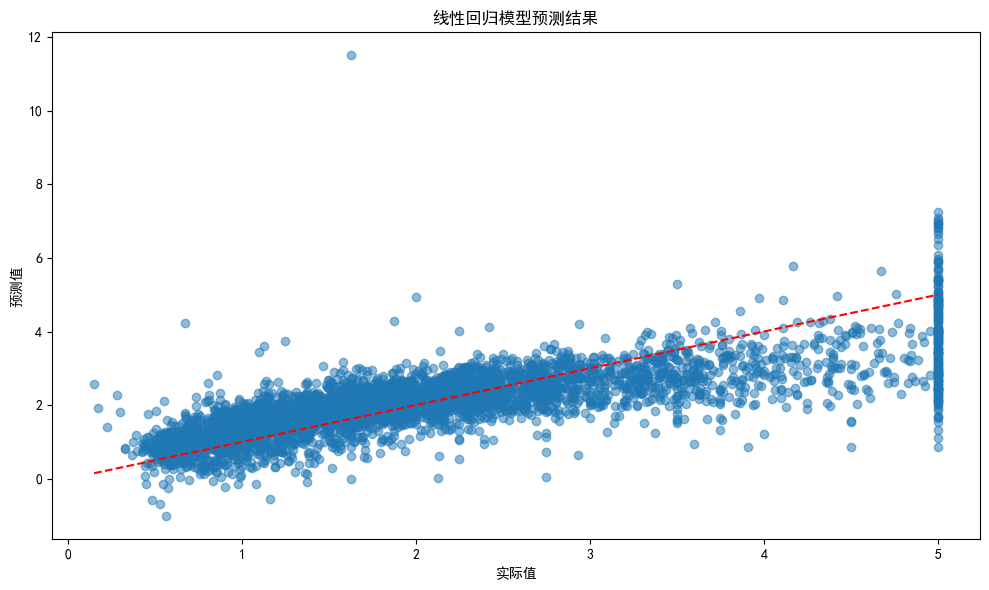

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib as mpl

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 加载加利福尼亚房价数据集
housing = fetch_california_housing()
X = housing.data
y = housing.target

# 检查数据集中是否存在缺失值
print("特征数据中的缺失值数量：")
print(np.isnan(X).sum())

print("\n目标变量中的缺失值数量：")
print(np.isnan(y).sum())

# 数据完整性总结
print("\n数据集形状：", X.shape)
print("目标变量形状：", y.shape)

# 查看特征名称
print("\n特征名称：")
print(housing.feature_names)  # 使用正确的属性名称feature_names
# 划分训练集和测试集，测试集占20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建线性回归模型
lin_reg = LinearRegression()

# 训练模型
lin_reg.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = lin_reg.predict(X_test)

# 计算模型性能指标
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n线性回归模型的均方误差: {mse:.4f}")

print(f"线性回归模型的R²分数: {r2:.4f}")

# 查看模型回归系数
print("\n模型回归系数:")
for feature, coef in zip(housing.feature_names, lin_reg.coef_):
    print(f"{feature}: {coef:.6f}")

print(f"\n截距项: {lin_reg.intercept_:.6f}")

# 分析特征重要性
coef_importance = pd.DataFrame({
    '特征': housing.feature_names,
    '系数': lin_reg.coef_
})
coef_importance['绝对系数'] = np.abs(coef_importance['系数'])
coef_importance = coef_importance.sort_values('绝对系数', ascending=False)



# 可视化预测结果
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.title('线性回归模型预测结果')
plt.tight_layout()
plt.show()
